In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('../..')
from nld_utils import *

In [74]:
N = 512
g = 1.2
W = np.random.randn(512, 512)*g*(1/np.sqrt(N))
tau = 20 # ms
dt = 1 # ms

T = 20000 # ms

r = np.zeros((T, N))
r[0] = np.random.randn(N)*0.01
for t in range(T - 1):
    r[t + 1] = r[t] + (dt/tau)*(-r[t] + np.tanh(W @ r[t]))

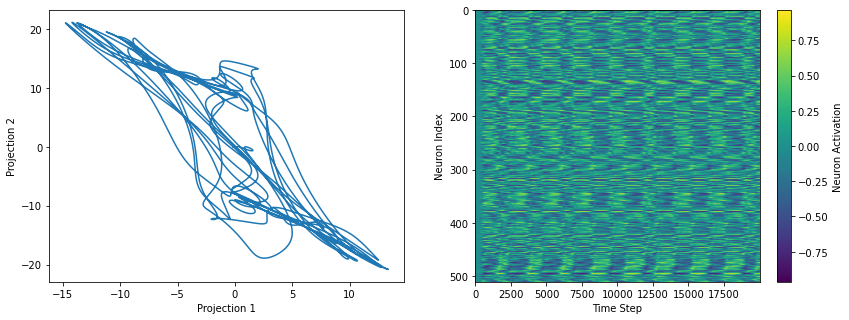

In [75]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
proj_vec1 = np.random.randn(N)
proj_vec2 = np.random.randn(N)
plt.plot(r @ proj_vec1, r @ proj_vec2)
plt.xlabel("Projection 1")
plt.ylabel("Projection 2")

plt.subplot(1, 2, 2)
plt.imshow(r.T, aspect='auto')
plt.xlabel("Time Step")
plt.ylabel("Neuron Index")
plt.colorbar(label="Neuron Activation")

plt.show()

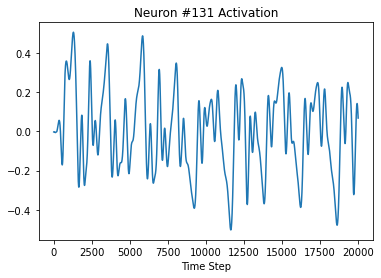

In [76]:
rand_ind = np.random.randint(512)
signal_in = r[:, rand_ind]
plt.plot(signal_in)
plt.xlabel("Time Step")
plt.title(f"Neuron #{rand_ind} Activation")
plt.show()

In [77]:
p = 1
r = 10
theiler_window = 60
maxt = 500
ret = lyapunov_analysis(signal_in, nlags=min(int(len(signal_in)/2), 1000), max_m=10, p=p, r=r, theiler_window=theiler_window, maxt=maxt)

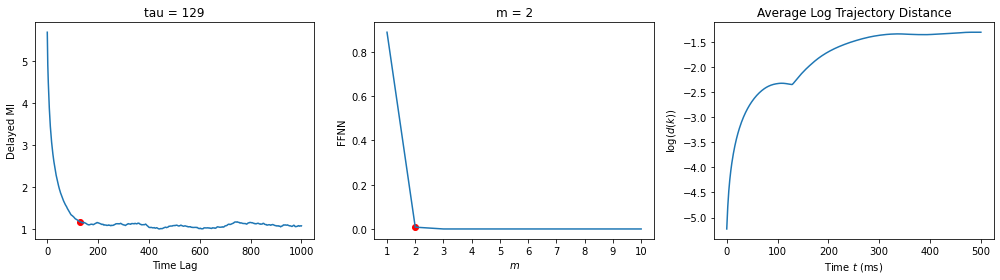

In [78]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(ret['delayed_mi'])
plt.title(f"tau = {ret['tau']}")
plt.scatter(ret['tau'], ret['delayed_mi'][ret['tau']], c='red')
plt.xlabel(r'Time Lag')
plt.ylabel(r'Delayed MI')

plt.subplot(1, 3, 2)
plt.plot(ret['m_vals'], ret['fraction_fnn'])
plt.title(f"m = {ret['m']}")
plt.scatter(ret['m'], ret['fraction_fnn'][ret['m'] - 1], c='red')
plt.xticks(ret['m_vals'], ret['m_vals'])
plt.xlabel(r'$m$')
plt.ylabel(r'FFNN')

plt.subplot(1, 3, 3)
ret['t'] = np.arange(len(ret['d']))
plt.plot(ret['t'], ret['d'])
plt.title(f"Average Log Trajectory Distance")
plt.xlabel(r'Time $t$ (ms)')
plt.ylabel(r'log($d(k)$)')

plt.tight_layout()
plt.show()